## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Datasets

Loading cleaned feature extraction datasets for all music collections.

In [2]:
# Define data paths
data_dir = Path('../data/feature-extraction-cleaned')

# Load all datasets
datasets = {
    'FMA Small': pd.read_csv(data_dir / 'fma_small_features_labeled.csv'),
    'FMA Medium': pd.read_csv(data_dir / 'fma_medium_features_labeled.csv'),
    'GTZAN': pd.read_csv(data_dir / 'gtzan_features.csv'),
    'Indian': pd.read_csv(data_dir / 'indian_features.csv'),
    'Ludwig': pd.read_csv(data_dir / 'ludwig_features.csv')
}

# Display dataset sizes
print("Dataset Sizes:")
print("=" * 50)
for name, df in datasets.items():
    print(f"{name:15s}: {len(df):6d} rows, {len(df.columns):3d} columns")
    
print("\nDatasets loaded successfully!")

Dataset Sizes:
FMA Small      :   7996 rows,  76 columns
FMA Medium     :  16986 rows,  76 columns
GTZAN          :    999 rows,  74 columns
Indian         :    500 rows,  75 columns
Ludwig         :  11293 rows,  75 columns

Datasets loaded successfully!


## Define Key Features for Outlier Analysis

Focus on features that are most sensitive to outliers and critical for clustering.

In [3]:
# Key features for outlier detection
key_features = ['tempo', 'rms_mean', 'spec_centroid_mean', 'zcr_mean']

print("Key Features for Outlier Analysis:")
print("=" * 50)
for i, feature in enumerate(key_features, 1):
    print(f"{i}. {feature}")

# Verify features exist in all datasets
print("\nVerifying feature availability across datasets...")
for name, df in datasets.items():
    missing = [f for f in key_features if f not in df.columns]
    if missing:
        print(f"⚠️  {name}: Missing features: {missing}")
    else:
        print(f"✓  {name}: All key features present")

Key Features for Outlier Analysis:
1. tempo
2. rms_mean
3. spec_centroid_mean
4. zcr_mean

Verifying feature availability across datasets...
✓  FMA Small: All key features present
✓  FMA Medium: All key features present
✓  GTZAN: All key features present
✓  Indian: All key features present
✓  Ludwig: All key features present


## Function: Calculate Outliers Using IQR Method

**IQR Method**: 
- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3 - Q1
- Lower Bound = Q1 - 1.5 * IQR
- Upper Bound = Q3 + 1.5 * IQR
- Outliers: Values < Lower Bound OR Values > Upper Bound

In [4]:
def detect_outliers_iqr(df, feature):
    """
    Detect outliers using IQR method for a specific feature.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset
    feature : str
        The feature column name
    
    Returns:
    --------
    dict : Dictionary containing outlier statistics
    """
    # Get the feature data
    data = df[feature].dropna()
    
    # Calculate quartiles
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100,
        'min_outlier': outliers.min() if len(outliers) > 0 else None,
        'max_outlier': outliers.max() if len(outliers) > 0 else None
    }

print("Outlier detection function defined successfully!")

Outlier detection function defined successfully!


## Outlier Analysis: FMA Small Dataset

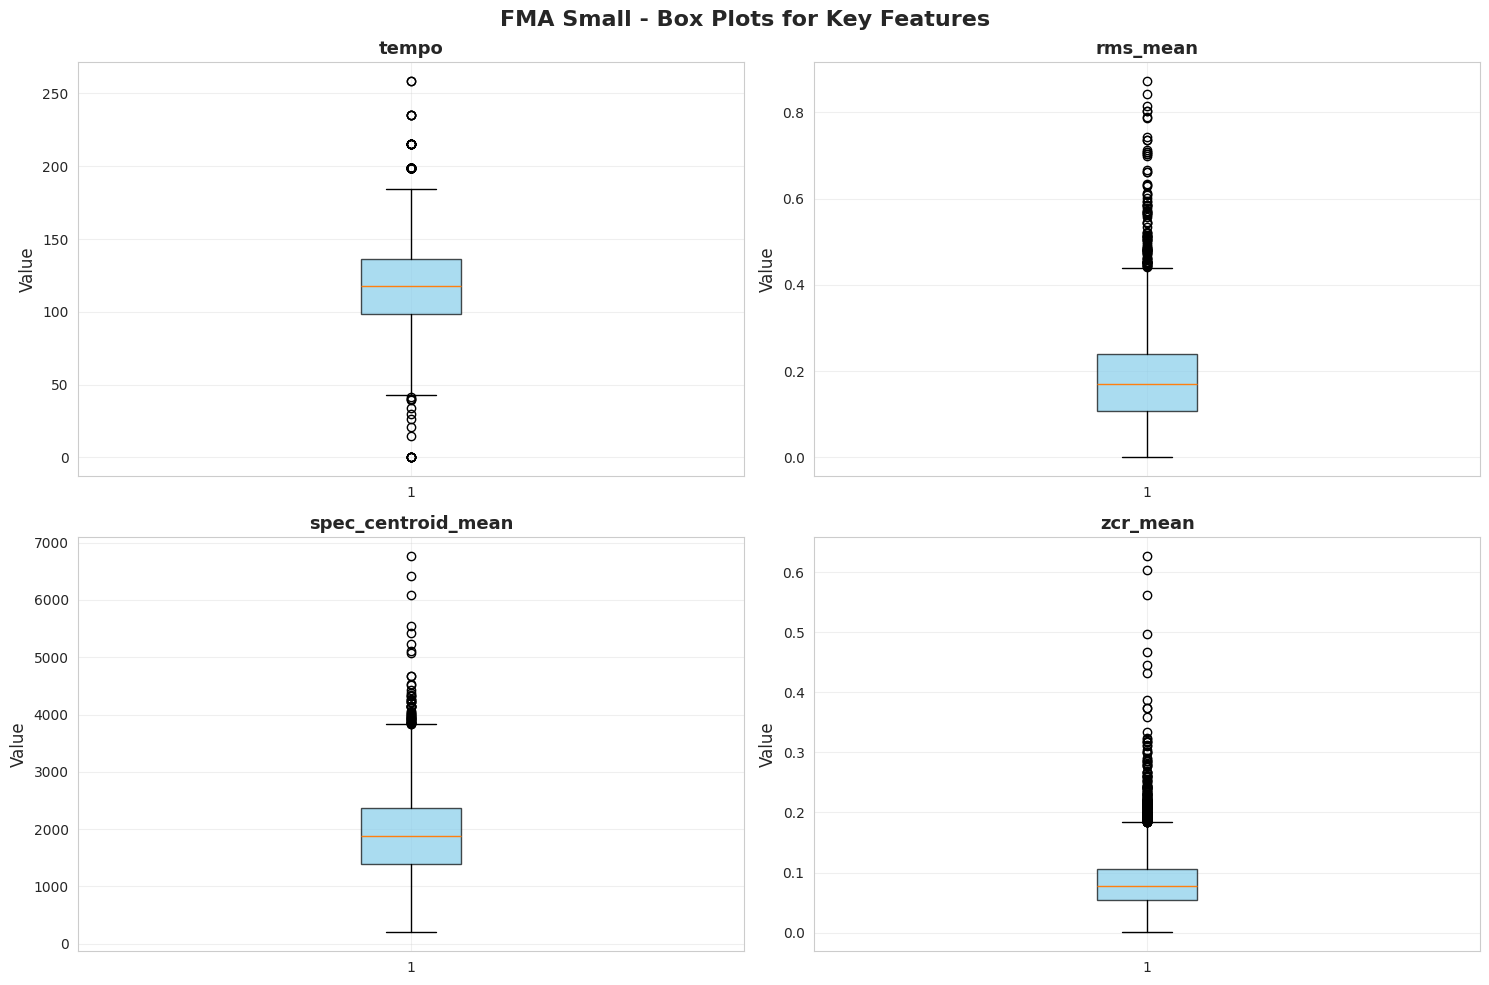


FMA Small - Outlier Statistics (IQR Method)
Total rows in dataset: 7996


TEMPO:
  Q1 (25th percentile):      98.4638
  Q3 (75th percentile):      135.9992
  IQR (Q3 - Q1):             37.5354
  Lower Bound (Q1 - 1.5*IQR): 42.1607
  Upper Bound (Q3 + 1.5*IQR): 192.3023
  Outlier Count:              91
  Outlier Percentage:         1.14%
  Min Outlier Value:          0.0000
  Max Outlier Value:          258.3984

RMS_MEAN:
  Q1 (25th percentile):      0.1074
  Q3 (75th percentile):      0.2405
  IQR (Q3 - Q1):             0.1331
  Lower Bound (Q1 - 1.5*IQR): -0.0922
  Upper Bound (Q3 + 1.5*IQR): 0.4402
  Outlier Count:              99
  Outlier Percentage:         1.24%
  Min Outlier Value:          0.4413
  Max Outlier Value:          0.8724

SPEC_CENTROID_MEAN:
  Q1 (25th percentile):      1392.5559
  Q3 (75th percentile):      2368.8656
  IQR (Q3 - Q1):             976.3097
  Lower Bound (Q1 - 1.5*IQR): -71.9087
  Upper Bound (Q3 + 1.5*IQR): 3833.3301
  Outlier Count:              5

In [5]:
# Box plots for FMA Small
dataset_name = 'FMA Small'
df = datasets[dataset_name]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{dataset_name} - Box Plots for Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    # Create box plot
    ax = axes[row, col]
    bp = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate outliers
print(f"\n{'='*70}")
print(f"{dataset_name} - Outlier Statistics (IQR Method)")
print(f"{'='*70}")
print(f"Total rows in dataset: {len(df)}\n")

for feature in key_features:
    stats = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Q1 (25th percentile):      {stats['Q1']:.4f}")
    print(f"  Q3 (75th percentile):      {stats['Q3']:.4f}")
    print(f"  IQR (Q3 - Q1):             {stats['IQR']:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {stats['lower_bound']:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {stats['upper_bound']:.4f}")
    print(f"  Outlier Count:              {stats['outlier_count']}")
    print(f"  Outlier Percentage:         {stats['outlier_percentage']:.2f}%")
    if stats['outlier_count'] > 0:
        print(f"  Min Outlier Value:          {stats['min_outlier']:.4f}")
        print(f"  Max Outlier Value:          {stats['max_outlier']:.4f}")

## Outlier Analysis: FMA Medium Dataset

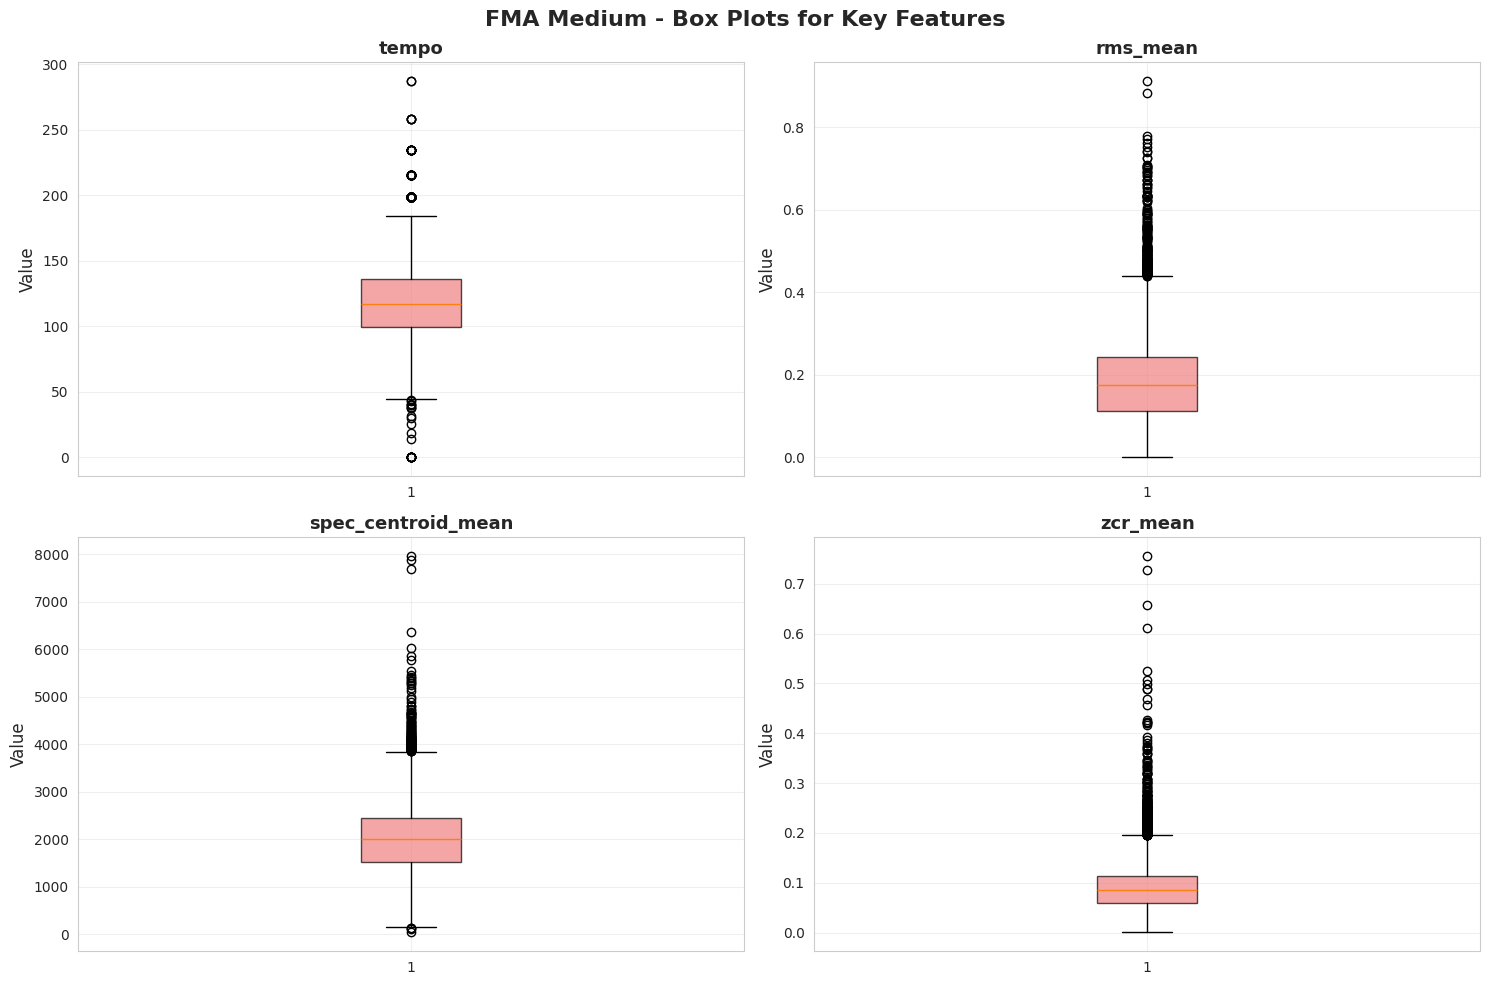


FMA Medium - Outlier Statistics (IQR Method)
Total rows in dataset: 16986


TEMPO:
  Q1 (25th percentile):      99.3840
  Q3 (75th percentile):      135.9992
  IQR (Q3 - Q1):             36.6152
  Lower Bound (Q1 - 1.5*IQR): 44.4613
  Upper Bound (Q3 + 1.5*IQR): 190.9219
  Outlier Count:              184
  Outlier Percentage:         1.08%
  Min Outlier Value:          0.0000
  Max Outlier Value:          287.1094

RMS_MEAN:
  Q1 (25th percentile):      0.1124
  Q3 (75th percentile):      0.2429
  IQR (Q3 - Q1):             0.1305
  Lower Bound (Q1 - 1.5*IQR): -0.0833
  Upper Bound (Q3 + 1.5*IQR): 0.4386
  Outlier Count:              216
  Outlier Percentage:         1.27%
  Min Outlier Value:          0.4390
  Max Outlier Value:          0.9115

SPEC_CENTROID_MEAN:
  Q1 (25th percentile):      1526.5577
  Q3 (75th percentile):      2453.6621
  IQR (Q3 - Q1):             927.1044
  Lower Bound (Q1 - 1.5*IQR): 135.9012
  Upper Bound (Q3 + 1.5*IQR): 3844.3187
  Outlier Count:           

In [6]:
# Box plots for FMA Medium
dataset_name = 'FMA Medium'
df = datasets[dataset_name]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{dataset_name} - Box Plots for Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    # Create box plot
    ax = axes[row, col]
    bp = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate outliers
print(f"\n{'='*70}")
print(f"{dataset_name} - Outlier Statistics (IQR Method)")
print(f"{'='*70}")
print(f"Total rows in dataset: {len(df)}\n")

for feature in key_features:
    stats = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Q1 (25th percentile):      {stats['Q1']:.4f}")
    print(f"  Q3 (75th percentile):      {stats['Q3']:.4f}")
    print(f"  IQR (Q3 - Q1):             {stats['IQR']:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {stats['lower_bound']:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {stats['upper_bound']:.4f}")
    print(f"  Outlier Count:              {stats['outlier_count']}")
    print(f"  Outlier Percentage:         {stats['outlier_percentage']:.2f}%")
    if stats['outlier_count'] > 0:
        print(f"  Min Outlier Value:          {stats['min_outlier']:.4f}")
        print(f"  Max Outlier Value:          {stats['max_outlier']:.4f}")

## Outlier Analysis: GTZAN Dataset

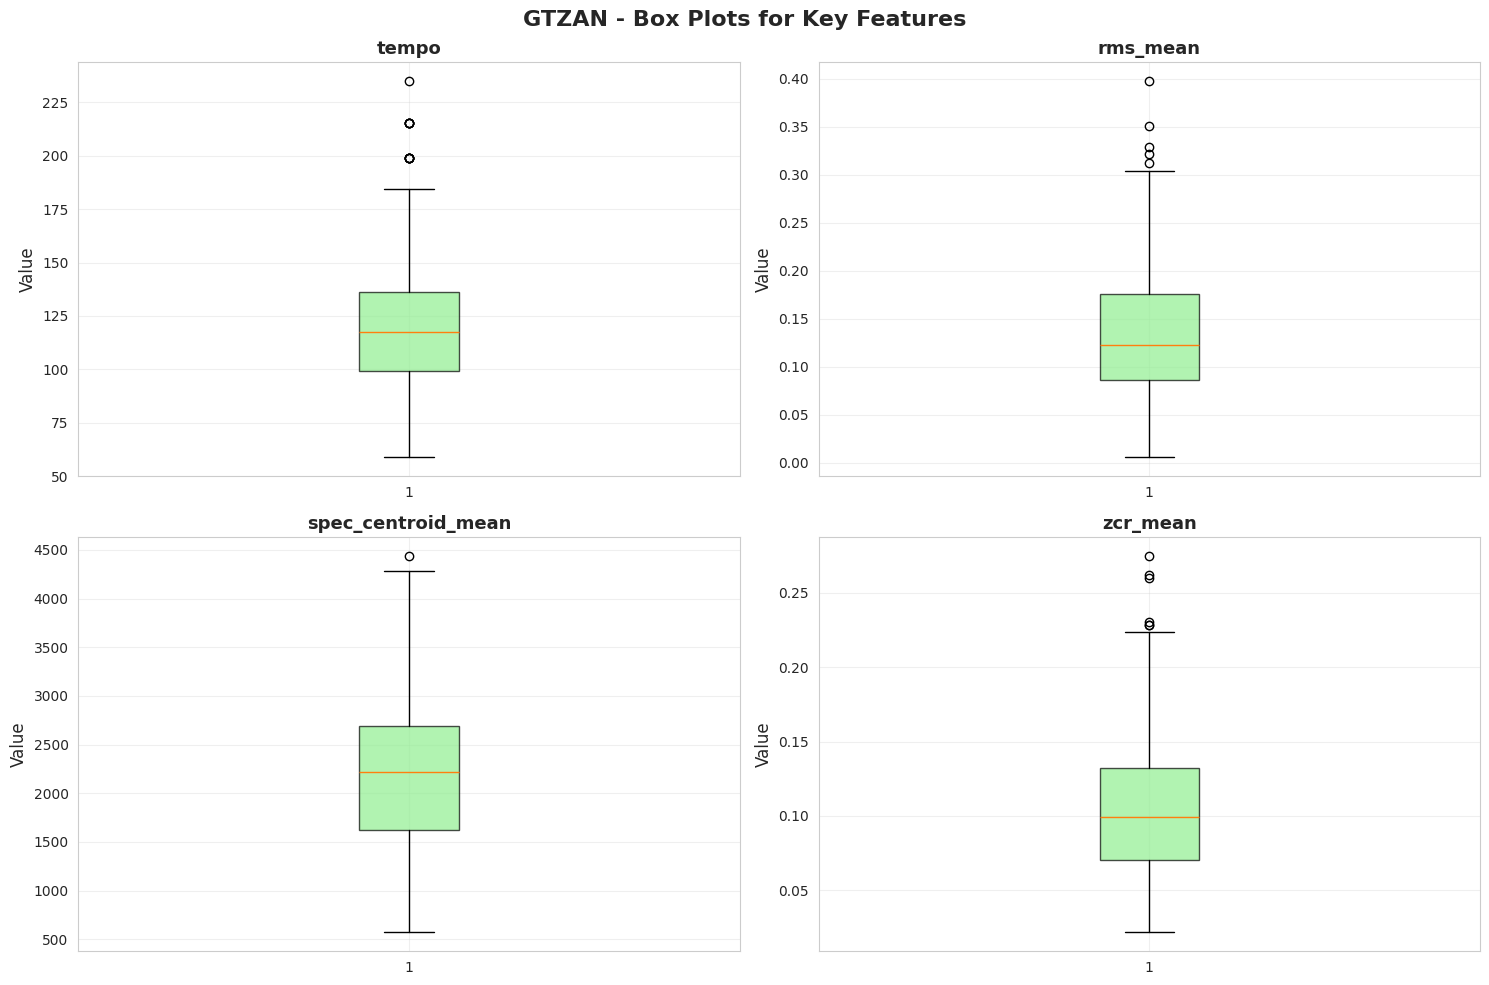


GTZAN - Outlier Statistics (IQR Method)
Total rows in dataset: 999


TEMPO:
  Q1 (25th percentile):      99.3840
  Q3 (75th percentile):      135.9992
  IQR (Q3 - Q1):             36.6152
  Lower Bound (Q1 - 1.5*IQR): 44.4613
  Upper Bound (Q3 + 1.5*IQR): 190.9219
  Outlier Count:              12
  Outlier Percentage:         1.20%
  Min Outlier Value:          198.7680
  Max Outlier Value:          234.9077

RMS_MEAN:
  Q1 (25th percentile):      0.0866
  Q3 (75th percentile):      0.1756
  IQR (Q3 - Q1):             0.0891
  Lower Bound (Q1 - 1.5*IQR): -0.0470
  Upper Bound (Q3 + 1.5*IQR): 0.3092
  Outlier Count:              5
  Outlier Percentage:         0.50%
  Min Outlier Value:          0.3127
  Max Outlier Value:          0.3977

SPEC_CENTROID_MEAN:
  Q1 (25th percentile):      1626.5270
  Q3 (75th percentile):      2691.6952
  IQR (Q3 - Q1):             1065.1682
  Lower Bound (Q1 - 1.5*IQR): 28.7747
  Upper Bound (Q3 + 1.5*IQR): 4289.4476
  Outlier Count:              1
  O

In [7]:
# Box plots for GTZAN
dataset_name = 'GTZAN'
df = datasets[dataset_name]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{dataset_name} - Box Plots for Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    # Create box plot
    ax = axes[row, col]
    bp = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate outliers
print(f"\n{'='*70}")
print(f"{dataset_name} - Outlier Statistics (IQR Method)")
print(f"{'='*70}")
print(f"Total rows in dataset: {len(df)}\n")

for feature in key_features:
    stats = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Q1 (25th percentile):      {stats['Q1']:.4f}")
    print(f"  Q3 (75th percentile):      {stats['Q3']:.4f}")
    print(f"  IQR (Q3 - Q1):             {stats['IQR']:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {stats['lower_bound']:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {stats['upper_bound']:.4f}")
    print(f"  Outlier Count:              {stats['outlier_count']}")
    print(f"  Outlier Percentage:         {stats['outlier_percentage']:.2f}%")
    if stats['outlier_count'] > 0:
        print(f"  Min Outlier Value:          {stats['min_outlier']:.4f}")
        print(f"  Max Outlier Value:          {stats['max_outlier']:.4f}")

## Outlier Analysis: Indian Dataset

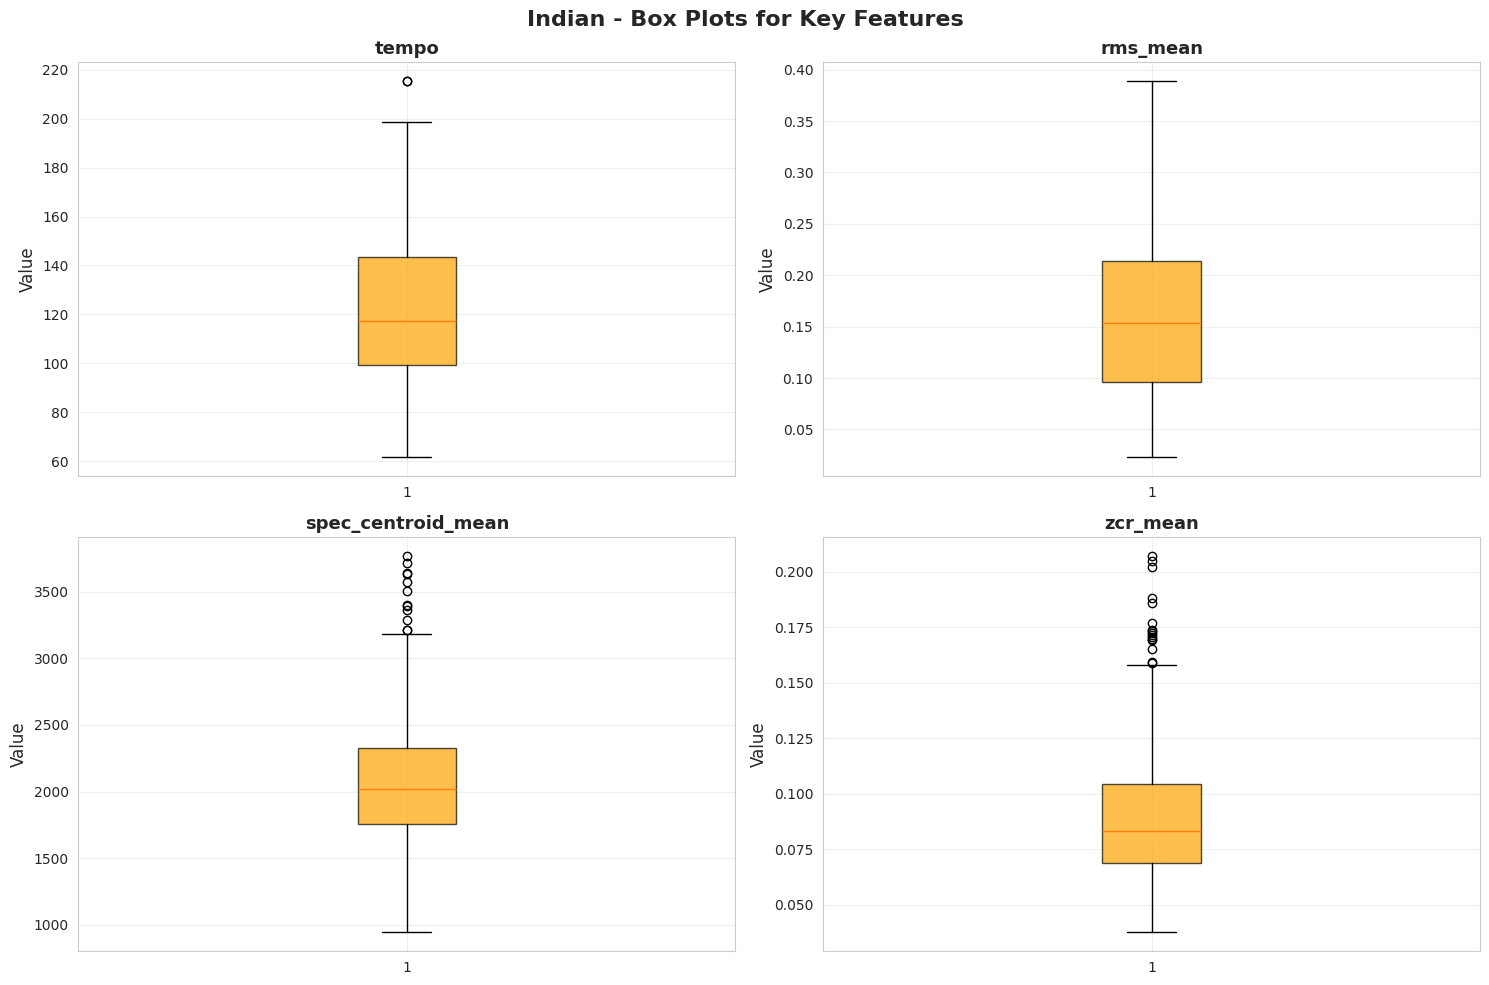


Indian - Outlier Statistics (IQR Method)
Total rows in dataset: 500


TEMPO:
  Q1 (25th percentile):      99.3840
  Q3 (75th percentile):      143.5547
  IQR (Q3 - Q1):             44.1707
  Lower Bound (Q1 - 1.5*IQR): 33.1280
  Upper Bound (Q3 + 1.5*IQR): 209.8107
  Outlier Count:              2
  Outlier Percentage:         0.40%
  Min Outlier Value:          215.3320
  Max Outlier Value:          215.3320

RMS_MEAN:
  Q1 (25th percentile):      0.0966
  Q3 (75th percentile):      0.2142
  IQR (Q3 - Q1):             0.1176
  Lower Bound (Q1 - 1.5*IQR): -0.0797
  Upper Bound (Q3 + 1.5*IQR): 0.3906
  Outlier Count:              0
  Outlier Percentage:         0.00%

SPEC_CENTROID_MEAN:
  Q1 (25th percentile):      1755.9243
  Q3 (75th percentile):      2330.1660
  IQR (Q3 - Q1):             574.2418
  Lower Bound (Q1 - 1.5*IQR): 894.5616
  Upper Bound (Q3 + 1.5*IQR): 3191.5287
  Outlier Count:              12
  Outlier Percentage:         2.40%
  Min Outlier Value:          3210.9367


In [8]:
# Box plots for Indian
dataset_name = 'Indian'
df = datasets[dataset_name]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{dataset_name} - Box Plots for Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    # Create box plot
    ax = axes[row, col]
    bp = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('orange')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate outliers
print(f"\n{'='*70}")
print(f"{dataset_name} - Outlier Statistics (IQR Method)")
print(f"{'='*70}")
print(f"Total rows in dataset: {len(df)}\n")

for feature in key_features:
    stats = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Q1 (25th percentile):      {stats['Q1']:.4f}")
    print(f"  Q3 (75th percentile):      {stats['Q3']:.4f}")
    print(f"  IQR (Q3 - Q1):             {stats['IQR']:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {stats['lower_bound']:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {stats['upper_bound']:.4f}")
    print(f"  Outlier Count:              {stats['outlier_count']}")
    print(f"  Outlier Percentage:         {stats['outlier_percentage']:.2f}%")
    if stats['outlier_count'] > 0:
        print(f"  Min Outlier Value:          {stats['min_outlier']:.4f}")
        print(f"  Max Outlier Value:          {stats['max_outlier']:.4f}")

## Outlier Analysis: Ludwig Dataset

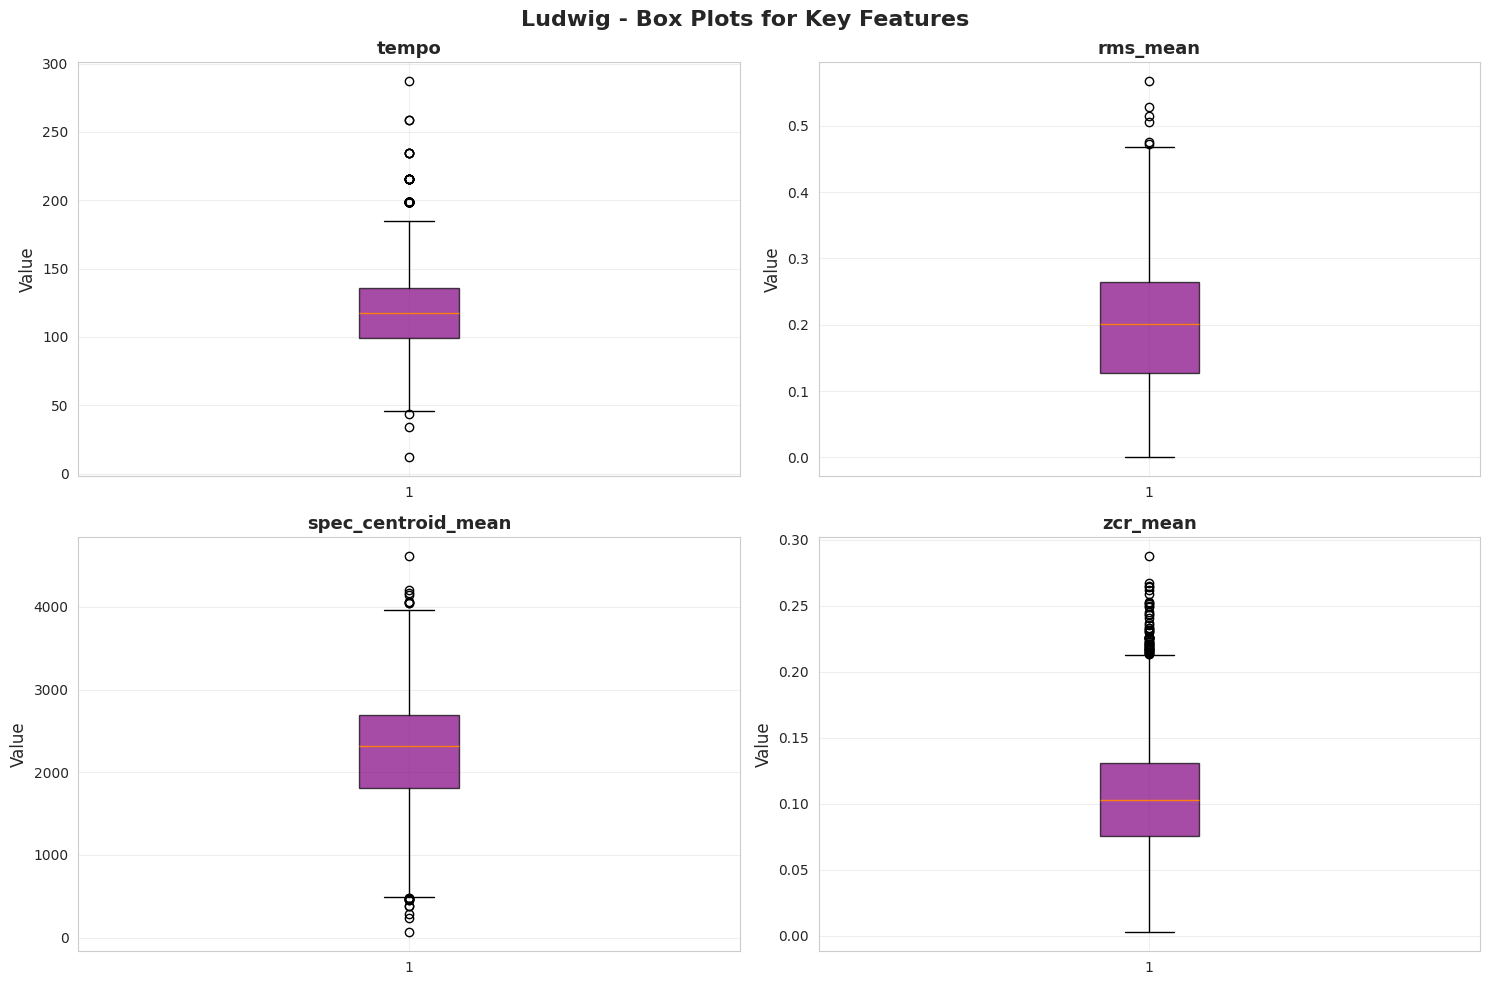


Ludwig - Outlier Statistics (IQR Method)
Total rows in dataset: 11293


TEMPO:
  Q1 (25th percentile):      99.3840
  Q3 (75th percentile):      135.9992
  IQR (Q3 - Q1):             36.6152
  Lower Bound (Q1 - 1.5*IQR): 44.4613
  Upper Bound (Q3 + 1.5*IQR): 190.9219
  Outlier Count:              69
  Outlier Percentage:         0.61%
  Min Outlier Value:          11.8531
  Max Outlier Value:          287.1094

RMS_MEAN:
  Q1 (25th percentile):      0.1272
  Q3 (75th percentile):      0.2649
  IQR (Q3 - Q1):             0.1376
  Lower Bound (Q1 - 1.5*IQR): -0.0792
  Upper Bound (Q3 + 1.5*IQR): 0.4713
  Outlier Count:              6
  Outlier Percentage:         0.05%
  Min Outlier Value:          0.4719
  Max Outlier Value:          0.5673

SPEC_CENTROID_MEAN:
  Q1 (25th percentile):      1806.7755
  Q3 (75th percentile):      2688.6002
  IQR (Q3 - Q1):             881.8247
  Lower Bound (Q1 - 1.5*IQR): 484.0384
  Upper Bound (Q3 + 1.5*IQR): 4011.3372
  Outlier Count:              20


In [9]:
# Box plots for Ludwig
dataset_name = 'Ludwig'
df = datasets[dataset_name]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{dataset_name} - Box Plots for Key Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    # Create box plot
    ax = axes[row, col]
    bp = ax.boxplot(df[feature].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('purple')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate outliers
print(f"\n{'='*70}")
print(f"{dataset_name} - Outlier Statistics (IQR Method)")
print(f"{'='*70}")
print(f"Total rows in dataset: {len(df)}\n")

for feature in key_features:
    stats = detect_outliers_iqr(df, feature)
    print(f"\n{feature.upper()}:")
    print(f"  Q1 (25th percentile):      {stats['Q1']:.4f}")
    print(f"  Q3 (75th percentile):      {stats['Q3']:.4f}")
    print(f"  IQR (Q3 - Q1):             {stats['IQR']:.4f}")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {stats['lower_bound']:.4f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {stats['upper_bound']:.4f}")
    print(f"  Outlier Count:              {stats['outlier_count']}")
    print(f"  Outlier Percentage:         {stats['outlier_percentage']:.2f}%")
    if stats['outlier_count'] > 0:
        print(f"  Min Outlier Value:          {stats['min_outlier']:.4f}")
        print(f"  Max Outlier Value:          {stats['max_outlier']:.4f}")

## Comparative Summary: Outliers Across All Datasets

Create a comprehensive comparison table showing outlier counts for each feature across all datasets.

In [10]:
# Create summary dataframe
summary_data = []

for dataset_name, df in datasets.items():
    row = {'Dataset': dataset_name, 'Total Rows': len(df)}
    
    for feature in key_features:
        stats = detect_outliers_iqr(df, feature)
        row[f'{feature}_outliers'] = stats['outlier_count']
        row[f'{feature}_pct'] = f"{stats['outlier_percentage']:.2f}%"
    
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*100)
print("COMPARATIVE OUTLIER SUMMARY - ALL DATASETS")
print("="*100)
print(summary_df.to_string(index=False))

# Calculate total outliers per dataset
print("\n" + "="*100)
print("TOTAL OUTLIER COUNTS BY FEATURE (Across All Datasets)")
print("="*100)

for feature in key_features:
    total = sum([detect_outliers_iqr(df, feature)['outlier_count'] for df in datasets.values()])
    total_rows = sum([len(df) for df in datasets.values()])
    pct = (total / total_rows) * 100
    print(f"{feature:20s}: {total:6d} outliers ({pct:.2f}% of total data)")


COMPARATIVE OUTLIER SUMMARY - ALL DATASETS
   Dataset  Total Rows  tempo_outliers tempo_pct  rms_mean_outliers rms_mean_pct  spec_centroid_mean_outliers spec_centroid_mean_pct  zcr_mean_outliers zcr_mean_pct
 FMA Small        7996              91     1.14%                 99        1.24%                           56                  0.70%                210        2.63%
FMA Medium       16986             184     1.08%                216        1.27%                          131                  0.77%                351        2.07%
     GTZAN         999              12     1.20%                  5        0.50%                            1                  0.10%                  6        0.60%
    Indian         500               2     0.40%                  0        0.00%                           12                  2.40%                 16        3.20%
    Ludwig       11293              69     0.61%                  6        0.05%                           20                  0.18

## Visualization: Outlier Comparison Across Datasets

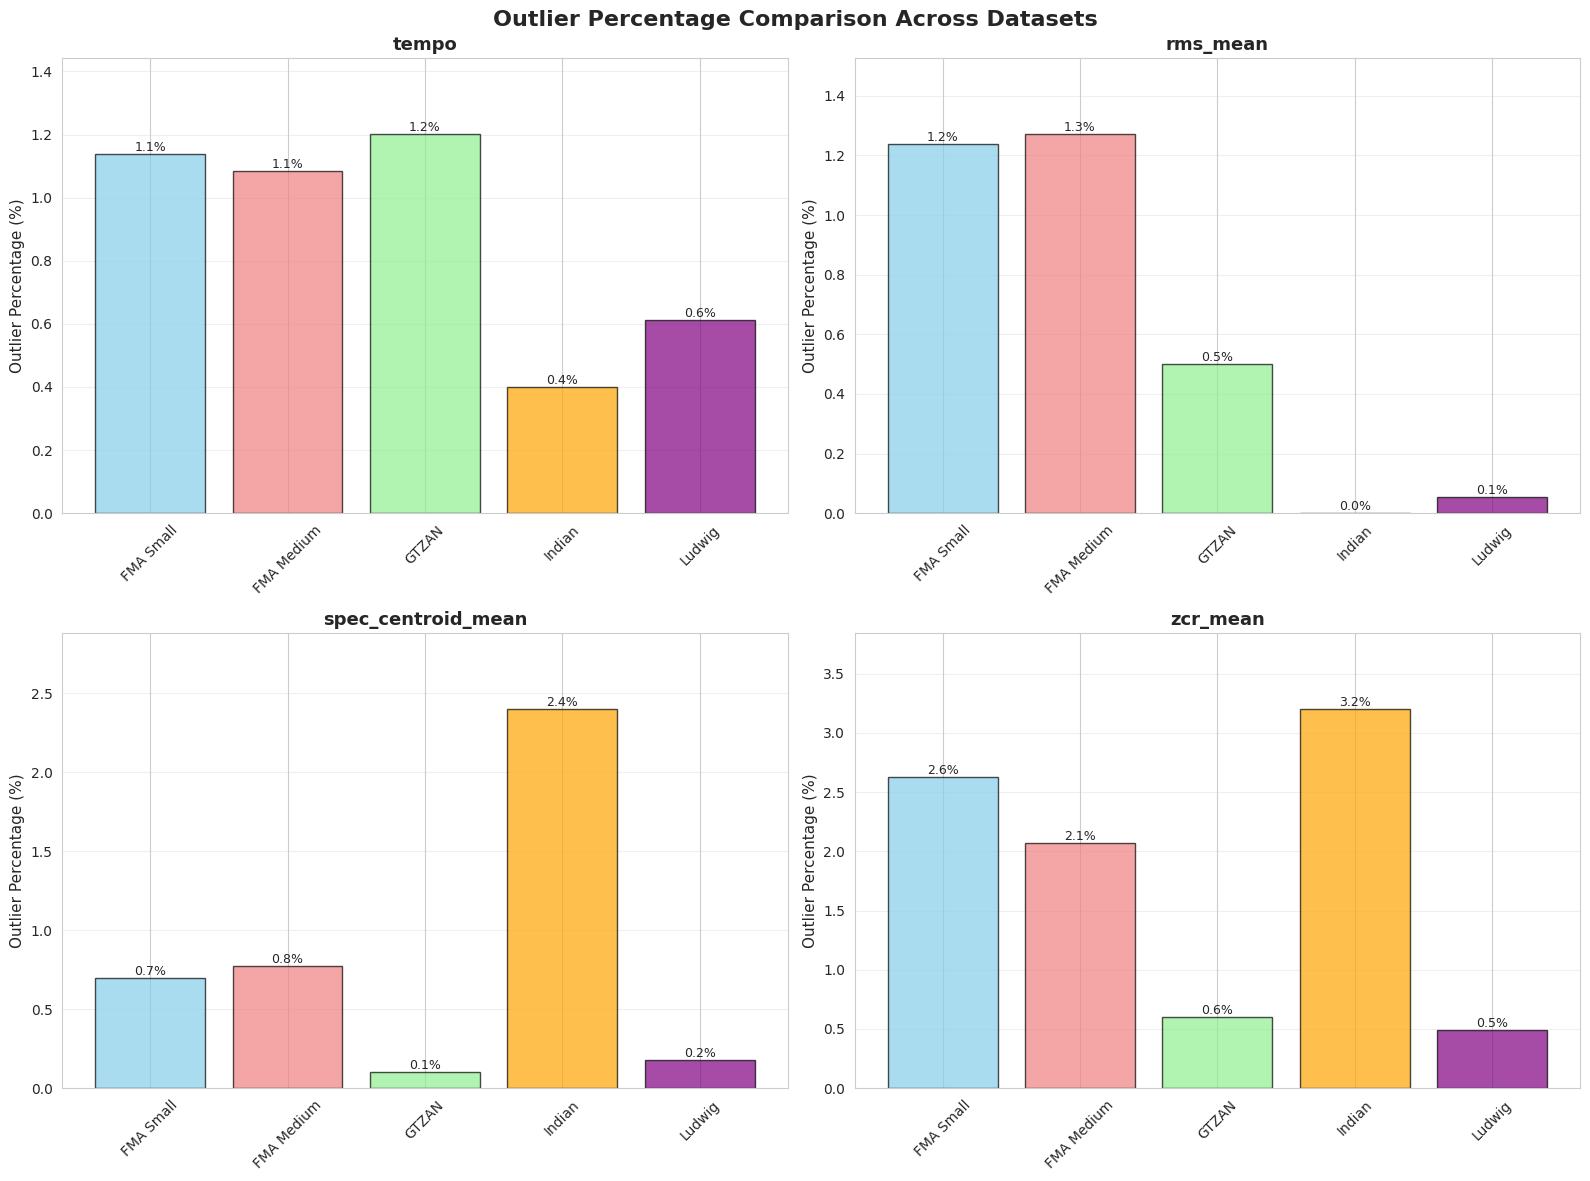

In [11]:
# Create bar chart comparing outlier percentages
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Outlier Percentage Comparison Across Datasets', fontsize=16, fontweight='bold')

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Collect data for this feature
    dataset_names = list(datasets.keys())
    outlier_pcts = [detect_outliers_iqr(datasets[name], feature)['outlier_percentage'] 
                    for name in dataset_names]
    
    # Create bar chart
    bars = ax.bar(dataset_names, outlier_pcts, color=colors, alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar, pct in zip(bars, outlier_pcts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel('Outlier Percentage (%)', fontsize=11)
    ax.set_title(f'{feature}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(outlier_pcts) * 1.2 if max(outlier_pcts) > 0 else 10)
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Key Findings and Recommendations

Analyze the results and provide recommendations for handling outliers.

In [12]:
print("\n" + "="*80)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("="*80)

print("\n📊 OUTLIER ANALYSIS SUMMARY:")
print("-" * 80)

# Analyze each feature
for feature in key_features:
    print(f"\n{feature.upper()}:")
    
    total_outliers = 0
    total_rows = 0
    most_affected = None
    max_pct = 0
    
    for name, df in datasets.items():
        stats = detect_outliers_iqr(df, feature)
        total_outliers += stats['outlier_count']
        total_rows += len(df[feature].dropna())
        
        if stats['outlier_percentage'] > max_pct:
            max_pct = stats['outlier_percentage']
            most_affected = name
    
    overall_pct = (total_outliers / total_rows) * 100
    
    print(f"  • Total outliers: {total_outliers:,} ({overall_pct:.2f}% of all data)")
    print(f"  • Most affected dataset: {most_affected} ({max_pct:.2f}% outliers)")
    
    # Provide severity assessment
    if overall_pct > 10:
        severity = "⚠️  HIGH"
        recommendation = "Consider outlier removal or robust scaling (e.g., RobustScaler)"
    elif overall_pct > 5:
        severity = "⚡ MODERATE"
        recommendation = "Apply capping/flooring at IQR bounds or use robust methods"
    else:
        severity = "✓  LOW"
        recommendation = "Outliers minimal; standard scaling should work fine"
    
    print(f"  • Severity: {severity}")
    print(f"  • Recommendation: {recommendation}")

print("\n" + "="*80)
print("🎯 NEXT STEPS FOR CLUSTERING:")
print("="*80)
print("""
1. OPTION A - Remove Outliers:
   - Filter out rows where any key feature is an outlier
   - Pros: Cleaner clusters, better K-Means performance
   - Cons: Loss of potentially valid data

2. OPTION B - Cap Outliers:
   - Replace outliers with upper/lower bounds
   - Pros: Retain all data, reduce extreme values
   - Cons: May distort true distributions

3. OPTION C - Robust Scaling:
   - Use RobustScaler (uses median and IQR instead of mean/std)
   - Pros: Less sensitive to outliers
   - Cons: May not eliminate outlier impact completely

4. RECOMMENDED APPROACH:
   - Use RobustScaler for normalization (Step 2)
   - Remove extreme outliers (>3x IQR) if present
   - Document outlier handling strategy for reproducibility
""")

print("\n✅ Outlier detection complete! Ready for Step 2: Normalization")


KEY FINDINGS AND RECOMMENDATIONS

📊 OUTLIER ANALYSIS SUMMARY:
--------------------------------------------------------------------------------

TEMPO:
  • Total outliers: 358 (0.95% of all data)
  • Most affected dataset: GTZAN (1.20% outliers)
  • Severity: ✓  LOW
  • Recommendation: Outliers minimal; standard scaling should work fine

RMS_MEAN:
  • Total outliers: 326 (0.86% of all data)
  • Most affected dataset: FMA Medium (1.27% outliers)
  • Severity: ✓  LOW
  • Recommendation: Outliers minimal; standard scaling should work fine

SPEC_CENTROID_MEAN:
  • Total outliers: 220 (0.58% of all data)
  • Most affected dataset: Indian (2.40% outliers)
  • Severity: ✓  LOW
  • Recommendation: Outliers minimal; standard scaling should work fine

ZCR_MEAN:
  • Total outliers: 638 (1.69% of all data)
  • Most affected dataset: Indian (3.20% outliers)
  • Severity: ✓  LOW
  • Recommendation: Outliers minimal; standard scaling should work fine

🎯 NEXT STEPS FOR CLUSTERING:

1. OPTION A - Remov

## Save Outlier Analysis Results

Export outlier statistics for documentation and future reference.

In [13]:
# Create output directory
output_dir = Path('../results/step1.3-outlier-detection')
output_dir.mkdir(parents=True, exist_ok=True)

# Save summary dataframe
summary_df.to_csv(output_dir / 'outlier_summary.csv', index=False)
print(f"✓ Outlier summary saved to: {output_dir / 'outlier_summary.csv'}")

# Save detailed statistics for each dataset
for dataset_name, df in datasets.items():
    detailed_stats = []
    
    for feature in key_features:
        stats = detect_outliers_iqr(df, feature)
        stats['dataset'] = dataset_name
        stats['feature'] = feature
        detailed_stats.append(stats)
    
    detailed_df = pd.DataFrame(detailed_stats)
    filename = f"{dataset_name.lower().replace(' ', '_')}_outlier_stats.csv"
    detailed_df.to_csv(output_dir / filename, index=False)
    print(f"✓ Detailed stats for {dataset_name} saved to: {output_dir / filename}")

print(f"\n✅ All outlier analysis results saved to: {output_dir}")

✓ Outlier summary saved to: ../results/step1.3-outlier-detection/outlier_summary.csv
✓ Detailed stats for FMA Small saved to: ../results/step1.3-outlier-detection/fma_small_outlier_stats.csv
✓ Detailed stats for FMA Medium saved to: ../results/step1.3-outlier-detection/fma_medium_outlier_stats.csv
✓ Detailed stats for GTZAN saved to: ../results/step1.3-outlier-detection/gtzan_outlier_stats.csv
✓ Detailed stats for Indian saved to: ../results/step1.3-outlier-detection/indian_outlier_stats.csv
✓ Detailed stats for Ludwig saved to: ../results/step1.3-outlier-detection/ludwig_outlier_stats.csv

✅ All outlier analysis results saved to: ../results/step1.3-outlier-detection
